### Loading useful packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from SettingPLOTs import *

### Reading dataset

In [2]:
columns = []
for ii in range(1,19):
    columns.append(f'Preg. {ii}')

def load_data(fname):
    dRaw = pd.read_csv(fname)
    dRaw.drop(['Carimbo de data/hora'], axis=1, inplace=True)
    dRaw.columns = columns
    return dRaw

In [3]:
# Grupo control
cpre = load_data('Grupo control - Preprueba.csv')
cpos = load_data('Grupo control - Posprueba.csv')

# Grupo experimental
epre = load_data('Grupo experimental - Preprueba.csv')
epos = load_data('Grupo experimental - Posprueba.csv')

epre.head(2)

,Preg. 1,Preg. 2,Preg. 3,Preg. 4,Preg. 5,Preg. 6,Preg. 7,Preg. 8,Preg. 9,Preg. 10,Preg. 11,Preg. 12,Preg. 13,Preg. 14,Preg. 15,Preg. 16,Preg. 17,Preg. 18
0,Informado,Si conozco,Conozco un poco,Muy informado,Muy de acuerdo,Algunas veces,Algunas veces,Indiferente,Casi siempre,Muy de acuerdo,Nunca,Muy de acuerdo,Algunas veces,Casi siempre,Nunca,Algunas veces,Algunas veces,Casi siempre
1,Informado,Si conozco,Indiferente,Muy informado,De acuerdo,Algunas veces,Algunas veces,Algunas veces,Indiferente,Muy de acuerdo,Nunca,De acuerdo,Indiferente,Casi siempre,Algunas veces,Indiferente,Casi siempre,Casi siempre


### Defining counts and percents

In [4]:
def data_stats(data, question, category):
    quest = f'Preg. {question}'
    sort = [s for s in sorter[category] if s in data[quest].unique()]
    idx = data[quest].value_counts().loc[sort[::-1]].index
    count = data[quest].value_counts().loc[sort[::-1]]
    return idx, count

In [5]:
sorter = [['Muy informado', 'Informado', 'Indiferente', 'Poco informado', 'Nada informado'],
          ['Conozco mucho', 'Si conozco', 'Indiferente', 'Conozco un poco', 'No conozco nada'],
          ['Muy de acuerdo', 'De acuerdo', 'Indiferente', 'En desacuerdo', 'Muy en desacuerdo'],
          ['Siempre', 'Casi siempre', 'Indiferente', 'Algunas veces', 'Nunca']]


def plot_bar(question, savefig=False):
    
    for category, items in enumerate(sorter):
        items = set(items)
        if set(cpre[f'Preg. {question}'].unique()).issubset(items)==True:
            break
    
    cpre_idx, cpre_count = data_stats(cpre, question, category)
    cpos_idx, cpos_count = data_stats(cpos, question, category)
    epre_idx, epre_count = data_stats(epre, question, category)
    epos_idx, epos_count = data_stats(epos, question, category)
    
    fig, ax = plt.subplots(ncols=2, figsize=cm2inch(15, 2), sharey=True)

    cpre_color, cpos_color = 'cornflowerblue', 'tomato'
    cpre_bars = ax[0].barh(cpre_idx, -cpre_count, color=cpre_color, label='Preprueba')
    cpos_bars = ax[0].barh(cpos_idx, cpos_count, color=cpos_color, label='Posprueba')

    epre_color, epos_color = 'cornflowerblue', 'tomato'
    epre_bars = ax[1].barh(epre_idx, -epre_count, color=epre_color, label='Preprueba')
    epos_bars = ax[1].barh(epos_idx, epos_count, color=epos_color, label='Posprueba')

    def show_percents(name_bars, δ):
        """
        Attach a text label above each bar in *name_bars*, displaying its percent.
        """
        global total
        total = 0
        for p in name_bars:
            total = total + p.get_width()

        for p in name_bars:
            width = p.get_width()
            plt.text(p.get_width()+δ, p.get_y()+0.5*p.get_height(), '{:.1f} %'.format(round((p.get_width()/total)*100, 2)), ha='center', va='center', fontsize=7)

    show_percents(cpre_bars, δ=-64)
    show_percents(cpos_bars, δ=-55.5)

    show_percents(epre_bars, δ=-4)
    show_percents(epos_bars, δ=4.5)

    N=total

    ax[0].set_xlim(-N, N)
    ax[0].set_xlabel('Frecuencia')
    ax[0].set_title('Grupo control', loc='center', y=1.4)
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, frameon=False)

    ax[1].set_xlim(-N, N)
    ax[1].set_xlabel('Frecuencia')
    ax[1].set_title('Grupo experimental', loc='center', y=1.4)
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, frameon=False)

    sns.despine(offset=5, trim=True)
    ax[0].set_xticks([-20, -10, 0, 10, 20])
    ax[0].set_xticklabels(['20', '10', '0', '10', '20'])
    ax[1].set_xticks([-20, -10, 0, 10, 20])
    ax[1].set_xticklabels(['20', '10', '0', '10', '20'])

    if savefig==True: plt.savefig(f'Pregunta {question} - Gráfico de barras.svg')
    plt.show()

In [6]:
# for jj in range(1,cpre.shape[1]+1):
#     print(f'Pregunta {jj}')
#     plot_bar(question=jj, savefig=False)

### Encoding survey options to a Linker scale

In [7]:
def Lscale(x):
    A = []
    for ii in range(len(sorter)): A.append(sorter[ii][x])
    return set(A)

def encode_opt(x):
    """
    Takes a string indicating opt and encodes it to an ordinal (numerical) variable.
    """
    if x in Lscale(0): x = 5
    if x in Lscale(1): x = 4
    if x in Lscale(2): x = 3
    if x in Lscale(3): x = 2
    if x in Lscale(4): x = 1
    
    return x

def Tab2Liker(data):
    encoded = data.copy()
    for column in data.columns:
        encoded[column] = data[column].map(encode_opt)
    return encoded

In [8]:
cpre_liker = Tab2Liker(cpre)
cpos_liker = Tab2Liker(cpos)
epre_liker = Tab2Liker(epre)
epos_liker = Tab2Liker(epos)

### Cronbach coefficients

$$\alpha = \frac{k}{k-1}\left[\frac{\sigma_\tau^2-\sum^k_{i=1}\sigma_i^2}{\sigma_\tau^2}\right]$$

$$\alpha = \frac{p}{p-1}\frac{\sum\sum_{j\neq k}\sigma_{jk}}{\sum\sum_{j,k}\sigma_{jk}}$$

In [9]:
def αCronbach(data):
    data_liker = Tab2Liker(data)
    k = data_liker.shape[1]
    σi2 = data_liker.var()
    στ2 = data_liker.sum(axis=1).var()
    print(k, sum(σi2), στ2)
    return k/(k-1)*(στ2-sum(σi2))/στ2

In [10]:
αCronbach(epre)

18 15.393333333333334 85.91666666666667


0.869118502881269

---
---
### Cronbach using correlation

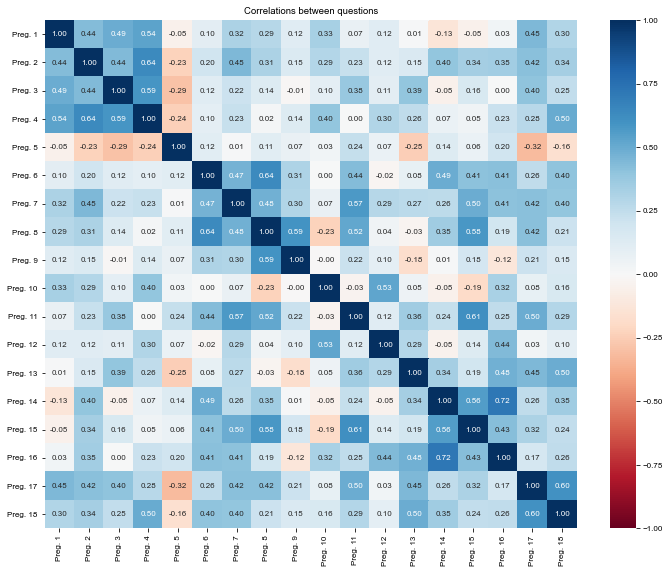

In [16]:
# Use Spearman instead of default Pearson, since these are ordinal variables!
corr_matrix = epre_liker.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.title("Correlations between questions")

plt.tight_layout()
plt.show()

In [12]:
print('Diagonal (sum): ', np.trace(corr_matrix))
print('All elements (sum): ', np.matrix(corr_matrix).sum())

Diagonal (sum):  18.0
All elements (sum):  86.51247566616627


In [13]:
Σdiag = np.trace(corr_matrix)
Σall = np.matrix(corr_matrix).sum()
Σelem = (Σall - Σdiag)/2

In [14]:
p = Σelem/corr_matrix.shape[0]
N = corr_matrix.shape[0]

$$\alpha = \frac{p}{p-1}\frac{\sum\sum_{j\neq k}\sigma_{jk}}{\sum\sum_{j,k}\sigma_{jk}}$$

In [15]:
αC = N*p/(1+p*(N-1))
αC

1.0270776616946375